# Example notebook for reionization

This notebook is an example of the reionization module

In [1]:
# Imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb

#### Get CLs for default  reionization

In [2]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

results = camb.get_results(pars)
cl=results.get_lensed_scalar_cls(CMB_unit ='muK')

#### Make  a very simple reionization history

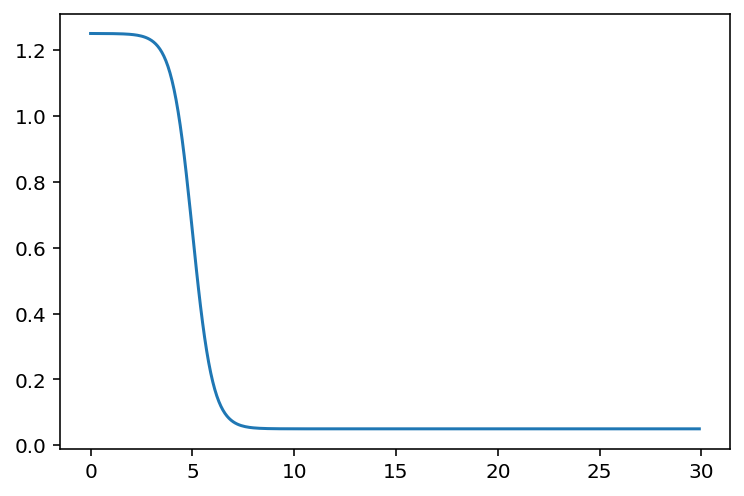

In [3]:
def RE(z, zre):
    return (-np.tanh(z-zre) + 1)/2.*1.2+0.05

z = np.arange(0,30,0.1)
xre = RE(z, 5)

plt.plot(z, xre)

#### Get Cls for it

In [4]:
pars2 = camb.CAMBparams()
pars2.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars2.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars2.set_for_lmax(2500, lens_potential_accuracy=0);

pars2.set_reionization_function(RE, args=[10])
results2 = camb.get_results(pars2)
cl2=results2.get_lensed_scalar_cls(CMB_unit ='muK')

#### Compare the Cls

Text(0, 0.5, '$\\ell(\\ell+1) C_\\ell/2\\pi\\, [\\mu K^2]$')

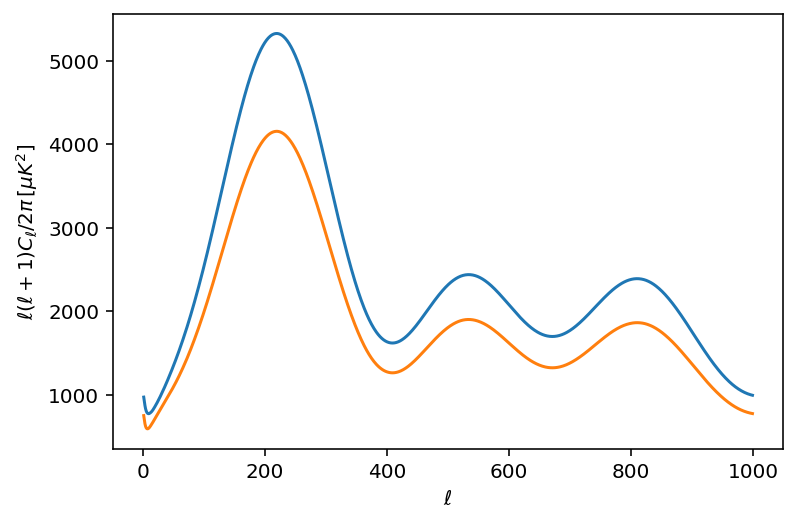

In [5]:
lmax= 1000
ls = np.arange(2,lmax)
plt.plot(ls,cl[2:lmax,0])
plt.plot(ls,cl2[2:lmax,0])
plt.xlabel(r'$\ell$');
plt.ylabel(r'$\ell(\ell+1) C_\ell/2\pi\, [\mu K^2]$')

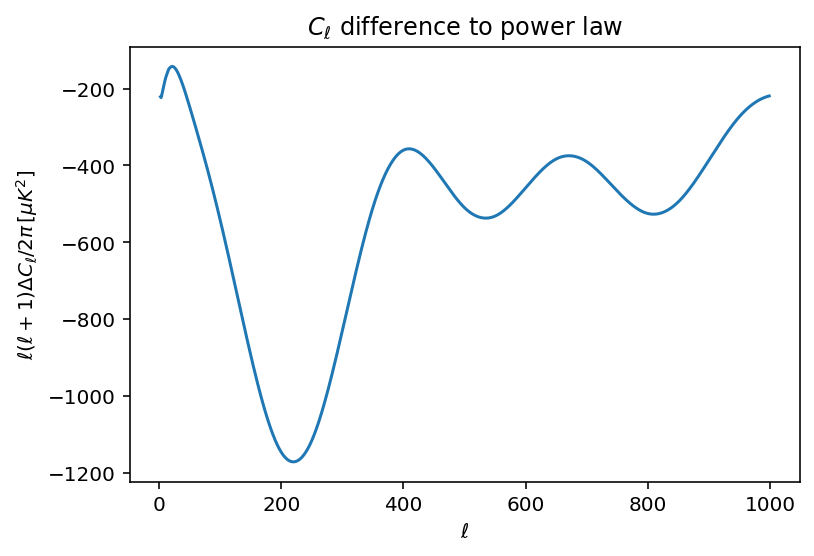

In [6]:
lmax= 1000
ls = np.arange(2,lmax)
plt.plot(ls,(cl2[2:lmax,0]-cl[2:lmax,0]))
plt.xlabel(r'$\ell$');
plt.ylabel(r'$\ell(\ell+1)\Delta C_\ell/2\pi\, [\mu K^2]$')
plt.title(r'$C_\ell$ difference to power law');